In [86]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
df = pd.read_csv('data/churn.csv')
df.head(5)

,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [5]:
df.nunique()

Unnamed: 0                      36992
age                                55
gender                              3
security_no                     36992
region_category                     3
membership_category                 6
joining_date                     1096
joined_through_referral             3
referral_id                     11359
preferred_offer_types               3
medium_of_operation                 4
internet_option                     3
last_visit_time                 30101
days_since_last_login              27
avg_time_spent                  25961
avg_transaction_value           36894
avg_frequency_login_days         1654
points_in_wallet                23699
used_special_discount               2
offer_application_preference        2
past_complaint                      2
complaint_status                    5
feedback                            9
churn_risk_score                    2
dtype: int64

In [13]:
df['age'].unique()
# 'age' includes numerical features only, seems to be OK

array([18, 32, 44, 37, 31, 13, 21, 42, 45, 25, 60, 11, 34, 40, 16, 57, 39,
       33, 30, 19, 48, 43, 29, 10, 20, 61, 17, 12, 52, 26, 49, 24, 22, 36,
       58, 41, 50, 23, 38, 35, 28, 53, 55, 59, 47, 54, 62, 51, 56, 27, 14,
       46, 15, 64, 63])

In [45]:
df['gender'].unique()
# 'gender' seems to be OK
# convert to category
df['gender'] = df['gender'].astype('category')
df['gender'].describe()

count     36992
unique        3
top           F
freq      18490
Name: gender, dtype: object

In [49]:
# drop 'security_no' and 'Unnamed: 0' because it has no predictiv value
df.drop(['security_no', 'Unnamed: 0'], axis=1, inplace=True)

In [47]:
print(df['region_category'].unique())
print(df['region_category'].isna().sum())
print(df['region_category'].isna().sum()/ df['region_category'].isna().count())
df['region_category'] = df['region_category'].astype('category')
df['region_category'].describe()

['Village' 'City' 'Town' nan]
5428
0.14673442906574394


count     31564
unique        3
top        Town
freq      14128
Name: region_category, dtype: object

region_category are three unique values: 'Village', 'City', 'Town' and 5428 missing values (14.67%)
convert to category

In [54]:
# membership_category 
print(df['membership_category'].unique())
# encode this feature after splitting into ordinal category


['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']


In [73]:
#sorted(df['joining_date'].unique())
#df['joining_date'].isna().sum()
df['joining_date'] = pd.to_datetime(df['joining_date'])
#TODO : change datetime to only date (to make it look nicer)

In [76]:
print(df['joining_date'].min())
print(df['joining_date'].max())

2015-01-01 00:00:00
2017-12-31 00:00:00


joining dates of 3 years

In [79]:
# joined_through_referral
print(df['joined_through_referral'].unique())


['No' '?' 'Yes']


In [81]:
print(df['referral_id'].groupby(df['joined_through_referral']).unique())

joined_through_referral
?      [CID21329, CID56614, CID35062, CID29752, CID40...
No                                            [xxxxxxxx]
Yes    [CID12313, CID3793, CID24708, CID19275, CID108...
Name: referral_id, dtype: object


In [82]:
df[['referral_id', 'joined_through_referral']].sample(30)

,referral_id,joined_through_referral
561,CID22881,Yes
26182,CID40165,Yes
15676,CID2732,Yes
27134,CID26108,Yes
22533,xxxxxxxx,No
9393,CID49428,Yes
17951,CID56806,Yes
14787,CID12869,Yes
32971,CID34612,?
12602,xxxxxxxx,Yes


In [94]:
df['referral_id'].iloc[1]

'CID21329'

In [99]:
df['referral_id'][df['referral_id'].str.startswith('CID')]
df['CID'] = df['referral_id']
df['CID'][df['CID'].str.startswith('CID')] = 'CID'

/var/folders/j_/q313_db90837xdp_yhd1p0g00000gn/T/ipykernel_14293/71707630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CID'][df['CID'].str.startswith('CID')] = 'CID'


In [100]:
df['CID'].unique()

array(['xxxxxxxx', 'CID', 'No referral'], dtype=object)

<Axes: xlabel='CID', ylabel='count'>

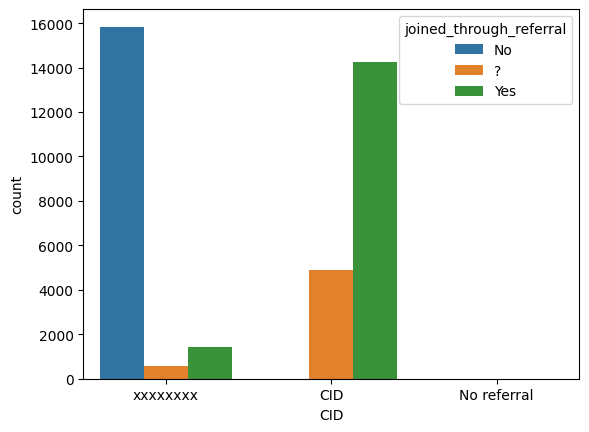

In [101]:
sns.countplot(df, hue='joined_through_referral', x='CID')

### features to be ordinal encoded after splitting:
- membership_category 

### features to be further examined:
- 'referral_id', 'joined_through_referral' 
  -> correlation between the features  
  -> how to deal with '?' and no_referrals with a CID-number   
  -> correlation between specific 'referral_id' and target. e.g. CID5xxx has a higher value for customer loyalty as CID1XXXX
